In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import os
import random
import matplotlib
import pandas as pd
from IPython.display import display, Image

get_graph
Hospitals DataFrame:
         name          y           x
0  Hospital_1  35.561571  139.564973
1  Hospital_2  35.570262  139.566587
2  Hospital_3  35.571847  139.554221
3  Hospital_4  35.566620  139.559196
4  Hospital_5  35.560925  139.560322

Supermarkets DataFrame:
            name          y           x
0  Supermarket_1  35.574898  139.569326
1  Supermarket_2  35.572824  139.559655
2  Supermarket_3  35.575064  139.561449
3  Supermarket_4  35.569192  139.561407
4  Supermarket_5  35.569580  139.561111
map saved


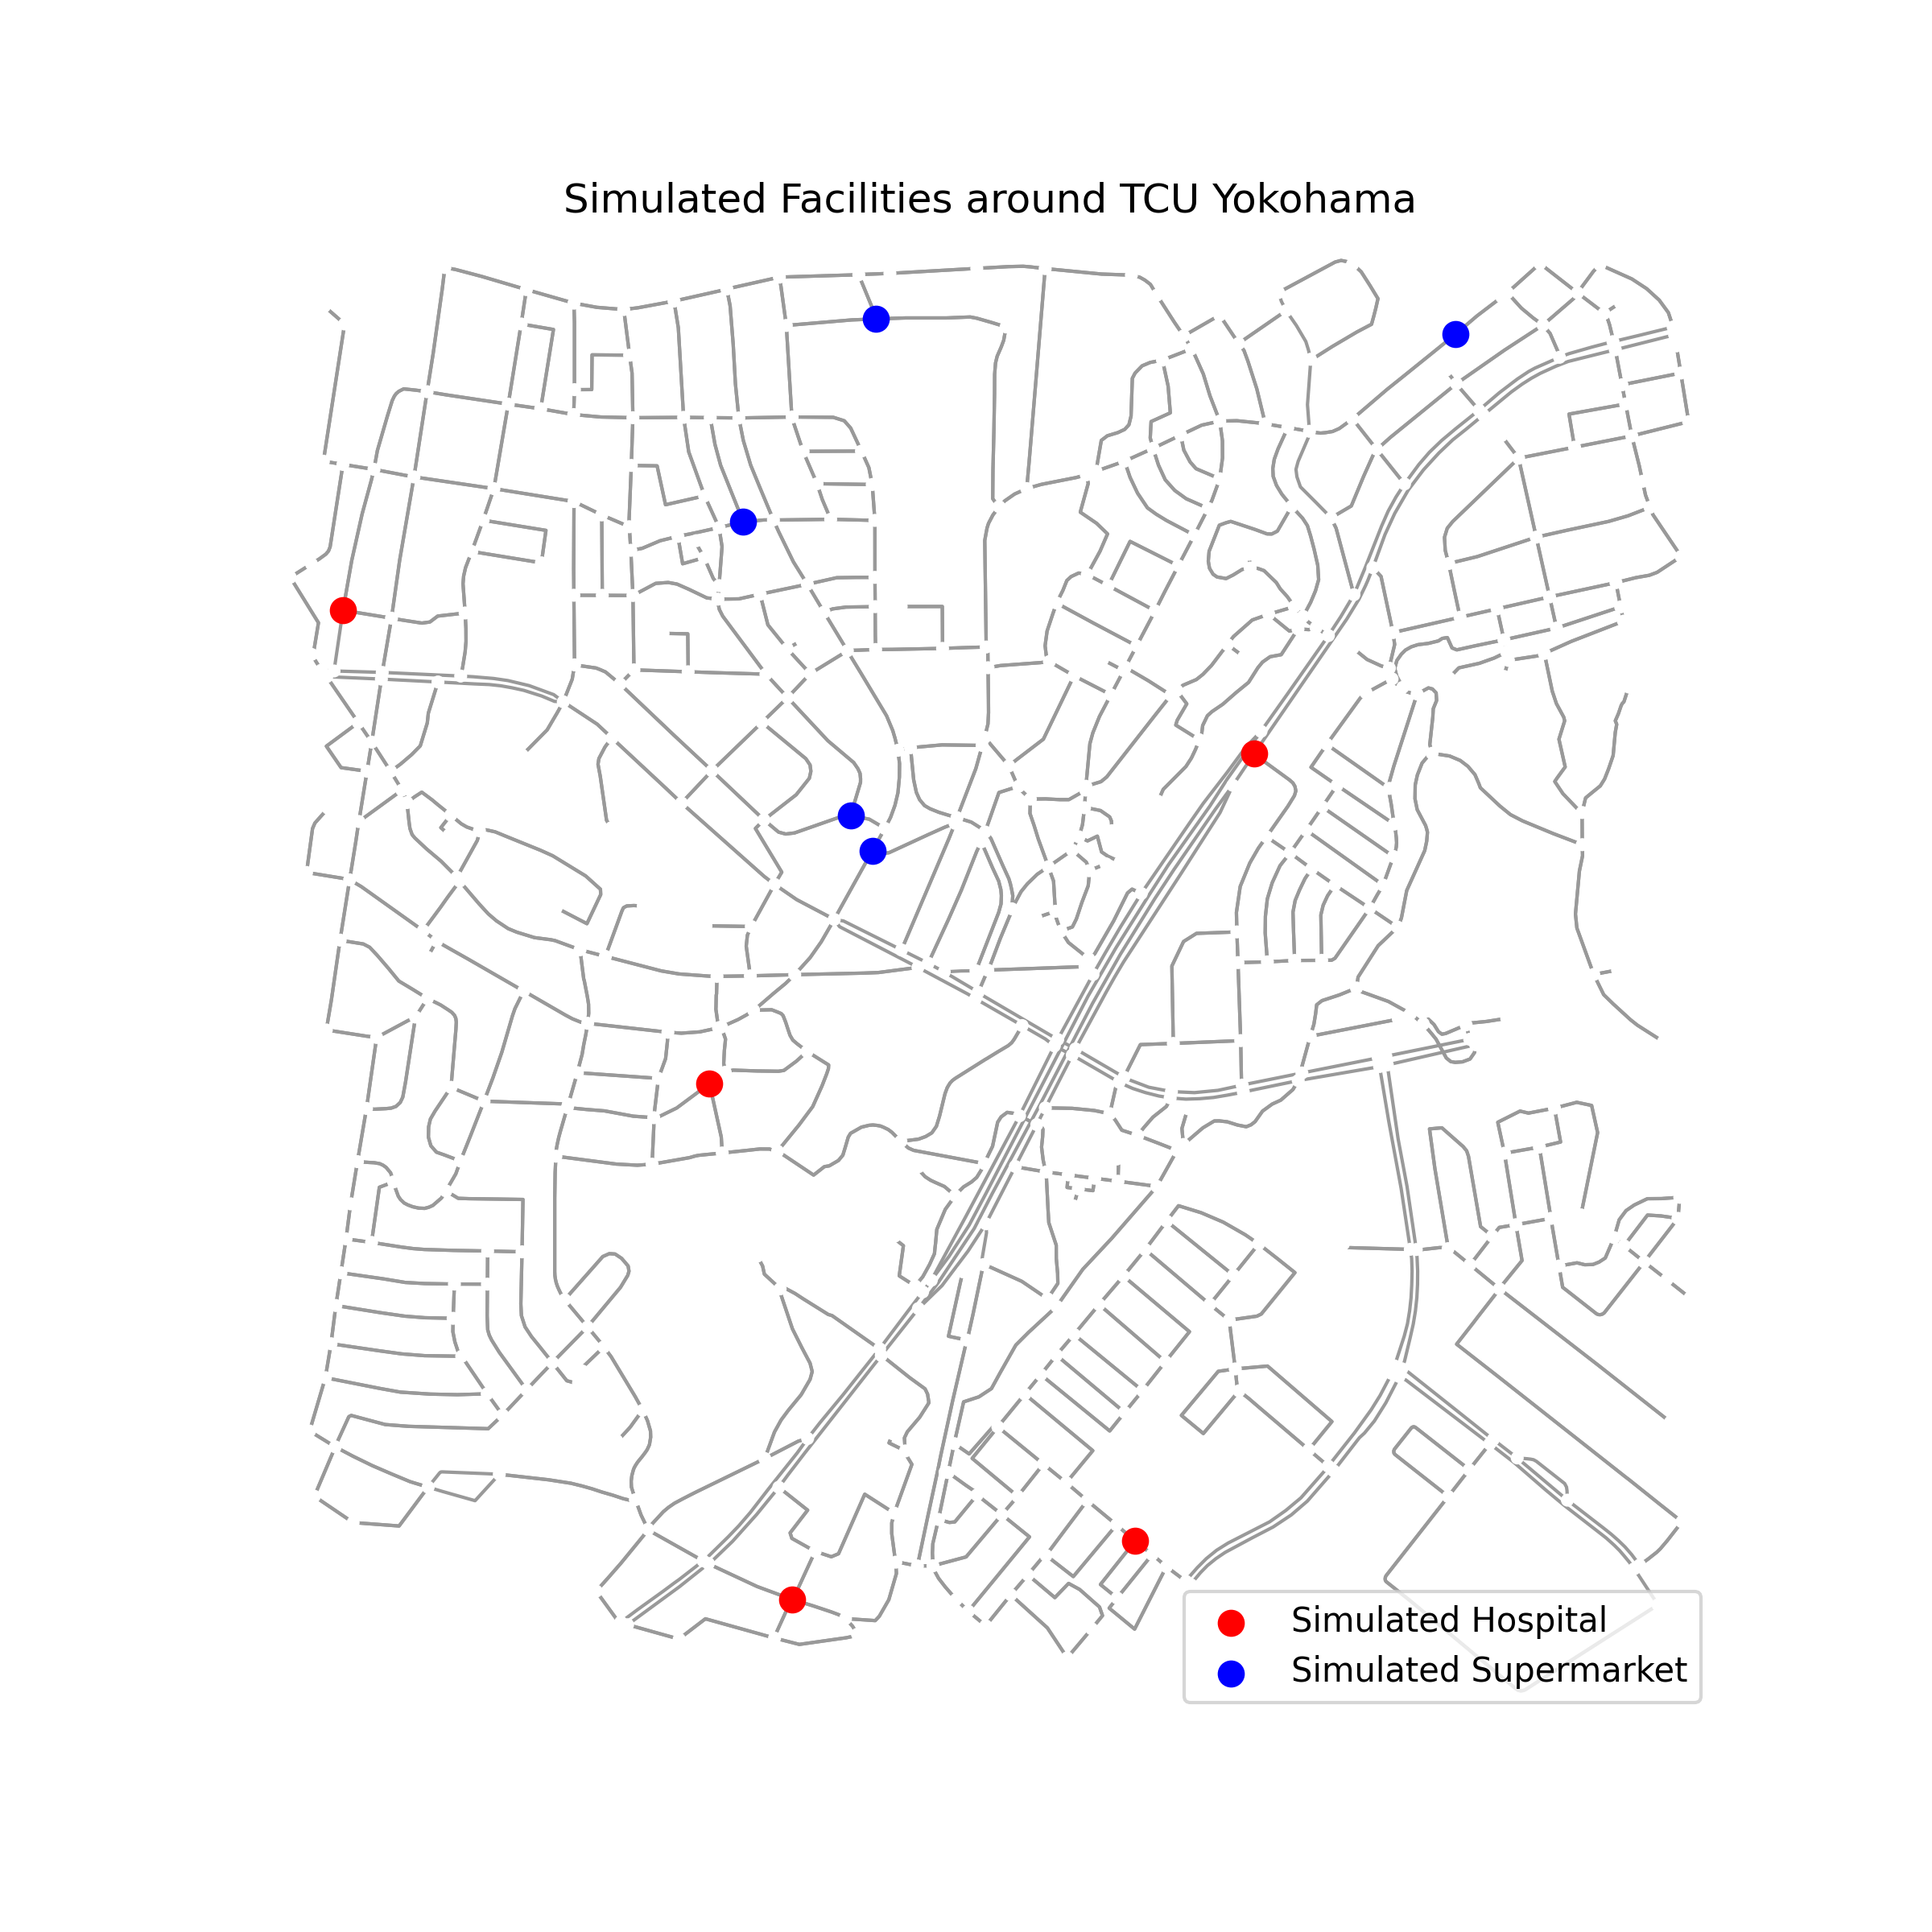

In [4]:
import pandas as pd
import random
import osmnx as ox
import matplotlib.pyplot as plt

# matplotlibのバックエンドをAggに設定
# この行は、実行環境によっては不要な場合があります
# plt.switch_backend('Agg')

# 東京都市大学 横浜キャンパスの緯度経度と、センター北駅までの距離（メートル）を指定
point = (35.568, 139.563) # 東京都市大学 横浜キャンパス
dist = 860 # 半径860メートル

# 道路網を取得
G = ox.graph_from_point(point, dist=dist, network_type="drive")
print("get_graph")

# 道路網の全てのノード（交差点）を取得
nodes = G.nodes()
node_points = list(nodes)

# ノードからランダムに10個の座標を選択
random_points = random.sample(node_points, 10)

# 最初の5つを病院、次の5つをスーパーとする
hospital_points = random_points[:5]
supermarket_points = random_points[5:]

# 病院に名前を付ける
hospital_names = [f"Hospital_{i+1}" for i in range(5)]

# スーパーマーケットに名前を付ける
supermarket_names = [f"Supermarket_{i+1}" for i in range(5)]

# プロット用のデータフレームを作成し、名前の列を追加
hospitals = pd.DataFrame(
    {'name': hospital_names,
     'y': [nodes[node]['y'] for node in hospital_points],
     'x': [nodes[node]['x'] for node in hospital_points]}
)

supermarkets = pd.DataFrame(
    {'name': supermarket_names,
     'y': [nodes[node]['y'] for node in supermarket_points],
     'x': [nodes[node]['x'] for node in supermarket_points]}
)

print("Hospitals DataFrame:")
print(hospitals)
print("\nSupermarkets DataFrame:")
print(supermarkets)

# 描画の準備
fig, ax = ox.plot_graph(G, show=False, bgcolor='#FFFFFF')
ax.set_title("Simulated Facilities around TCU Yokohama")

# 病院を赤色でプロット
ax.scatter(hospitals['x'], hospitals['y'], color='red', s=50, label='Simulated Hospital')

# スーパーマーケットを青色でプロット
ax.scatter(supermarkets['x'], supermarkets['y'], color='blue', s=50, label='Simulated Supermarket')

# 凡例を表示
ax.legend()

# 描画した画像をファイルとして保存
plt.savefig('tcu_map_simulated_facilities_named.png', dpi=300)
print("map saved")

# ファイルを読み込んで表示
from IPython.display import Image, display
display(Image(filename='tcu_map_simulated_facilities_named.png'))

# 描画ウィンドウを閉じる
plt.close(fig)